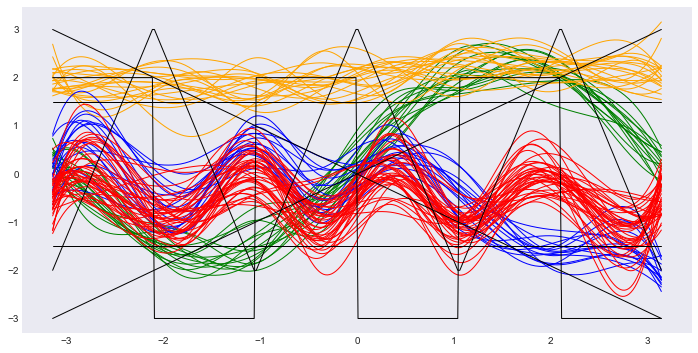

In [12]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.interpolate import spline
import warnings
warnings.filterwarnings("ignore")


synthetic_data=np.zeros((96,300))
#pre-set for drawing
plt.style.use('seaborn-dark')
fig = plt.figure(figsize=(12,6))
ax=plt.gca()
X = np.linspace(-np.pi, np.pi, 10)
xnew = np.linspace(X.min(),X.max(),300) #300 represents number of points to make between T.min and T.max
np.random.seed(42)
for i in range(90):
    if i <15:
        Y= 2*np.sin(X)+np.random.normal(-2,0.3,10) +2.3 
        power_smooth = spline(X,Y,xnew)
        ax.plot(xnew,power_smooth,color='green',linewidth=1)
        synthetic_data[i]=power_smooth

    elif i >=15 and i<35:
        Y= 0.25*np.sin(8*X)+np.random.normal(0,0.3,10) +2
        power_smooth = spline(X,Y,xnew)
        ax.plot(xnew,power_smooth,color='orange',linewidth=1)
        synthetic_data[i]=power_smooth

    elif i>=35 and i<50:
        X_1 = np.linspace(-np.pi, 1, 7)
        Y_1 = 0.5*np.sin(4*X_1)+np.random.normal(2,0.4,7)-2
        X_2 = np.linspace(2, np.pi, 3)
        Y_2 = -0.5*np.sin(2*X_2)+np.random.normal(2,0.25,3)-4
        XX = np.hstack((X_1,X_2))
        YY = np.hstack((Y_1,Y_2))
        XN = np.linspace(XX.min(),XX.max(),300) #300 represents number of points to make between T.min and T.max
        power_smooth = spline(XX,YY,XN)
        ax.plot(xnew,power_smooth,color='blue',linewidth=1)
        synthetic_data[i]=power_smooth

    else:
        Y= 0.6*np.sin(4*X)+np.random.normal(0,0.4,10)-0.5
        power_smooth = spline(X,Y,xnew)
        ax.plot(xnew,power_smooth,color='red',linewidth=1)
        synthetic_data[i]=power_smooth
        
outlier1_Y=np.repeat(-1.5,300)
synthetic_data[90]=outlier1_Y
outlier2_Y=np.repeat(1.5,300)
synthetic_data[91]=outlier2_Y
outlier3_Y=np.repeat(2,300)
synthetic_data[92]=outlier3_Y
outlier3_Y[50:100]=-3
outlier3_Y[150:200]=-3
outlier3_Y[250:300]=-3
outlier4_Y=np.linspace(-3, 3, num=300)
synthetic_data[93]=outlier4_Y
outlier5_Y=np.linspace(3, -3, num=300)
synthetic_data[94]=outlier5_Y
outlier6_Y=np.hstack((np.linspace(-2,3,num=50),np.linspace(3,-2,num=50),np.linspace(-2,3,num=50),np.linspace(3,-2,num=50),np.linspace(-2,3,num=50),np.linspace(3,-2,num=50)))
synthetic_data[95]=outlier6_Y
ax.plot(xnew,outlier1_Y,color='k',linewidth=1)
ax.plot(xnew,outlier2_Y,color='k',linewidth=1)
ax.plot(xnew,outlier3_Y,color='k',linewidth=1)
ax.plot(xnew,outlier4_Y,color='k',linewidth=1)
ax.plot(xnew,outlier5_Y,color='k',linewidth=1)
ax.plot(xnew,outlier6_Y,color='k',linewidth=1)

np.savetxt('synthetic data new', synthetic_data, delimiter=',') 

In [22]:
import os
from io import StringIO

import netCDF4 as nc
import numpy as np
import pdb

import sys
sys.path.append('/Users/macbook/Documents/MSS Create Synthetic Dataset')

from syntheticCase1 import generateField

class RangeData(object):
    """
    Test Data Setup
    """
    def __init__(self):
        self.forecast_sfc = """\
Geopotential_surface
surface_geopotential
m2.s-2
3
time,lat,lon
  2.12e+03   4.74e+03
Surface_pressure_surface
surface_air_pressure
Pa
3
time,lat,lon
  9.89e+04   5.30e+03
Total_cloud_cover_surface
total_cloud_cover
(0.-.1)
3
time,lat,lon
  6.32e-01   3.93e-01
Land-sea_mask_surface
land_binary_mask
(0.-.1)
3
time,lat,lon
  4.20e-01   4.94e-01
Low_cloud_cover_surface
low_type_cloud_area_fraction
(0.-.1)
3
time,lat,lon
  3.67e-01   3.91e-01
Medium_cloud_cover_surface
medium_type_cloud_area_fraction
(0.-.1)
3
time,lat,lon
  2.95e-01   3.77e-01
High_cloud_cover_surface
high_type_cloud_area_fraction
(0.-.1)
3
time,lat,lon
  4.07e-01   4.41e-01
"""
        self.forecast_pressure_levels_pl = """\
Geopotential_isobaric
geopotential_height
m2.s-2
5
time,ens0,isobaric,lat,lon
3
  2.57e+05   9.22e+02
  2.33e+05   6.80e+02
  2.01e+05   6.96e+02
"""
        self.forecast_pressure_levels_pl_old = """\
Geopotential_isobaric
geopotential_height
m2.s-2
5
time,ens0,isobaric,lat,lon
18
  2.57e+05   9.22e+02
  2.33e+05   6.80e+02
  2.01e+05   6.96e+02
  1.81e+05   9.61e+02
  1.59e+05   1.48e+03
  1.34e+05   2.17e+03
  1.17e+05   2.55e+03
  1.02e+05   2.63e+03
  9.07e+04   2.50e+03
  7.11e+04   2.09e+03
  5.51e+04   1.73e+03
  4.15e+04   1.43e+03
  2.97e+04   1.18e+03
  1.91e+04   9.65e+02
  1.43e+04   8.72e+02
  9.68e+03   7.96e+02
  7.46e+03   7.65e+02
  5.29e+03   7.40e+02
"""
        self.forecast_p_derived_ml = """\
Pressure
air_pressure
Pa
4
time,hybrid,lat,lon
72
  1.35e+03   2.44e-04
  1.59e+03   6.10e-04
  1.85e+03   4.39e-03
  2.14e+03   8.06e-03
  2.46e+03   4.64e-03
  2.80e+03   5.37e-03
  3.17e+03   7.32e-03
  3.56e+03   1.46e-03
  3.98e+03   9.77e-04
  4.43e+03   1.61e-02
  4.91e+03   1.12e-02
  5.41e+03   6.84e-03
  5.93e+03   1.95e-03
  6.48e+03   6.35e-03
  7.05e+03   1.86e-02
  7.64e+03   3.75e-02
  8.26e+03   1.83e-01
  8.90e+03   4.93e-01
  9.56e+03   1.09e+00
  1.03e+04   2.19e+00
  1.10e+04   4.10e+00
  1.18e+04   7.16e+00
  1.26e+04   1.18e+01
  1.34e+04   1.86e+01
  1.43e+04   2.81e+01
  1.53e+04   4.07e+01
  1.63e+04   5.71e+01
  1.74e+04   7.78e+01
  1.86e+04   1.03e+02
  1.98e+04   1.35e+02
  2.11e+04   1.72e+02
  2.25e+04   2.16e+02
  2.39e+04   2.67e+02
  2.55e+04   3.25e+02
  2.71e+04   3.92e+02
  2.88e+04   4.68e+02
  3.06e+04   5.54e+02
  3.25e+04   6.49e+02
  3.45e+04   7.55e+02
  3.66e+04   8.72e+02
  3.89e+04   1.00e+03
  4.12e+04   1.14e+03
  4.37e+04   1.30e+03
  4.63e+04   1.46e+03
  4.90e+04   1.64e+03
  5.18e+04   1.82e+03
  5.46e+04   2.02e+03
  5.74e+04   2.22e+03
  6.02e+04   2.42e+03
  6.30e+04   2.62e+03
  6.58e+04   2.82e+03
  6.85e+04   3.02e+03
  7.11e+04   3.22e+03
  7.37e+04   3.42e+03
  7.62e+04   3.61e+03
  7.86e+04   3.79e+03
  8.08e+04   3.97e+03
  8.30e+04   4.13e+03
  8.50e+04   4.29e+03
  8.70e+04   4.44e+03
  8.87e+04   4.57e+03
  9.03e+04   4.70e+03
  9.18e+04   4.81e+03
  9.31e+04   4.91e+03
  9.43e+04   5.00e+03
  9.53e+04   5.07e+03
  9.62e+04   5.13e+03
  9.69e+04   5.18e+03
  9.76e+04   5.22e+03
  9.81e+04   5.25e+03
  9.85e+04   5.28e+03
  9.88e+04   5.29e+03
"""
        self.forecast_cc_ml = """\
Fraction_of_cloud_cover_hybrid
cloud_area_fraction_in_atmosphere_layer
(0.-.1)
4
time,hybrid,lat,lon
72
  0.00e+00   0.00e+00
  0.00e+00   0.00e+00
  0.00e+00   0.00e+00
  0.00e+00   0.00e+00
  0.00e+00   0.00e+00
  0.00e+00   0.00e+00
  0.00e+00   0.00e+00
  0.00e+00   0.00e+00
  0.00e+00   0.00e+00
  0.00e+00   0.00e+00
  0.00e+00   0.00e+00
  0.00e+00   0.00e+00
  0.00e+00   0.00e+00
  0.00e+00   0.00e+00
  0.00e+00   0.00e+00
  0.00e+00   0.00e+00
  0.00e+00   0.00e+00
  0.00e+00   0.00e+00
  0.00e+00   0.00e+00
  2.99e-06   4.96e-04
  2.27e-04   1.25e-02
  6.74e-04   2.07e-02
  1.50e-03   2.85e-02
  5.20e-03   5.75e-02
  1.14e-02   8.97e-02
  1.89e-02   1.15e-01
  2.73e-02   1.40e-01
  3.49e-02   1.58e-01
  4.43e-02   1.76e-01
  5.84e-02   1.99e-01
  7.84e-02   2.30e-01
  1.02e-01   2.60e-01
  1.31e-01   2.89e-01
  1.60e-01   3.15e-01
  1.79e-01   3.29e-01
  1.87e-01   3.34e-01
  1.87e-01   3.34e-01
  1.81e-01   3.31e-01
  1.71e-01   3.23e-01
  1.58e-01   3.14e-01
  1.46e-01   3.04e-01
  1.34e-01   2.94e-01
  1.23e-01   2.83e-01
  1.14e-01   2.73e-01
  1.07e-01   2.64e-01
  1.01e-01   2.57e-01
  9.70e-02   2.52e-01
  9.44e-02   2.47e-01
  9.27e-02   2.43e-01
  9.10e-02   2.39e-01
  9.09e-02   2.38e-01
  9.22e-02   2.37e-01
  9.58e-02   2.38e-01
  1.01e-01   2.39e-01
  1.09e-01   2.42e-01
  1.18e-01   2.46e-01
  1.29e-01   2.53e-01
  1.39e-01   2.60e-01
  1.50e-01   2.72e-01
  1.57e-01   2.86e-01
  1.57e-01   2.96e-01
  1.58e-01   3.06e-01
  1.47e-01   3.07e-01
  1.34e-01   3.03e-01
  1.16e-01   2.89e-01
  9.84e-02   2.69e-01
  8.10e-02   2.45e-01
  6.50e-02   2.19e-01
  4.90e-02   1.86e-01
  3.58e-02   1.55e-01
  2.75e-02   1.29e-01
  1.25e-02   9.57e-02
"""
        self.forecast_t_ml = """\
Temperature_hybrid
air_temperature
K
4
time,hybrid,lat,lon
72
  2.16e+02   5.68e+00
  2.16e+02   5.04e+00
  2.15e+02   4.25e+00
  2.15e+02   3.43e+00
  2.14e+02   2.73e+00
  2.13e+02   2.24e+00
  2.13e+02   2.02e+00
  2.12e+02   2.08e+00
  2.12e+02   2.31e+00
  2.12e+02   2.64e+00
  2.11e+02   3.03e+00
  2.12e+02   3.47e+00
  2.12e+02   3.93e+00
  2.12e+02   4.39e+00
  2.12e+02   4.86e+00
  2.12e+02   5.31e+00
  2.12e+02   5.69e+00
  2.12e+02   6.01e+00
  2.12e+02   6.24e+00
  2.13e+02   6.35e+00
  2.13e+02   6.37e+00
  2.13e+02   6.32e+00
  2.14e+02   6.23e+00
  2.15e+02   6.12e+00
  2.15e+02   6.00e+00
  2.16e+02   5.88e+00
  2.16e+02   5.81e+00
  2.17e+02   5.69e+00
  2.17e+02   5.46e+00
  2.18e+02   5.12e+00
  2.19e+02   4.71e+00
  2.20e+02   4.31e+00
  2.21e+02   4.05e+00
  2.23e+02   4.05e+00
  2.25e+02   4.36e+00
  2.28e+02   4.89e+00
  2.30e+02   5.43e+00
  2.33e+02   5.84e+00
  2.36e+02   6.12e+00
  2.39e+02   6.32e+00
  2.42e+02   6.46e+00
  2.45e+02   6.57e+00
  2.49e+02   6.64e+00
  2.52e+02   6.69e+00
  2.54e+02   6.71e+00
  2.57e+02   6.72e+00
  2.60e+02   6.73e+00
  2.62e+02   6.73e+00
  2.64e+02   6.73e+00
  2.66e+02   6.74e+00
  2.68e+02   6.80e+00
  2.70e+02   6.89e+00
  2.72e+02   7.03e+00
  2.73e+02   7.19e+00
  2.75e+02   7.34e+00
  2.76e+02   7.50e+00
  2.77e+02   7.63e+00
  2.78e+02   7.74e+00
  2.79e+02   7.84e+00
  2.80e+02   7.95e+00
  2.81e+02   8.04e+00
  2.81e+02   8.12e+00
  2.82e+02   8.17e+00
  2.83e+02   8.18e+00
  2.83e+02   8.17e+00
  2.84e+02   8.17e+00
  2.84e+02   8.17e+00
  2.85e+02   8.17e+00
  2.85e+02   8.20e+00
  2.85e+02   8.25e+00
  2.85e+02   8.34e+00
  2.85e+02   8.49e+00
"""
        self.forecast_u_ml = """\
u-component_of_wind_hybrid
eastward_wind
m/s
4
time,hybrid,lat,lon
72
  8.27e+00   1.04e+01
  6.90e+00   9.58e+00
  5.81e+00   8.57e+00
  4.98e+00   7.59e+00
  4.33e+00   6.78e+00
  3.86e+00   6.15e+00
  3.57e+00   5.65e+00
  3.43e+00   5.32e+00
  3.42e+00   5.10e+00
  3.52e+00   4.90e+00
  3.76e+00   4.73e+00
  4.13e+00   4.61e+00
  4.59e+00   4.53e+00
  5.10e+00   4.50e+00
  5.67e+00   4.52e+00
  6.30e+00   4.61e+00
  6.94e+00   4.84e+00
  7.62e+00   5.20e+00
  8.32e+00   5.59e+00
  8.98e+00   6.01e+00
  9.62e+00   6.60e+00
  1.03e+01   7.33e+00
  1.10e+01   8.06e+00
  1.16e+01   8.68e+00
  1.23e+01   9.18e+00
  1.28e+01   9.68e+00
  1.34e+01   1.03e+01
  1.40e+01   1.10e+01
  1.46e+01   1.19e+01
  1.51e+01   1.28e+01
  1.54e+01   1.36e+01
  1.55e+01   1.40e+01
  1.54e+01   1.43e+01
  1.51e+01   1.44e+01
  1.46e+01   1.43e+01
  1.41e+01   1.40e+01
  1.34e+01   1.36e+01
  1.28e+01   1.30e+01
  1.22e+01   1.24e+01
  1.16e+01   1.18e+01
  1.10e+01   1.12e+01
  1.05e+01   1.07e+01
  9.94e+00   1.02e+01
  9.41e+00   9.71e+00
  8.88e+00   9.26e+00
  8.38e+00   8.86e+00
  7.89e+00   8.49e+00
  7.42e+00   8.16e+00
  6.95e+00   7.89e+00
  6.49e+00   7.67e+00
  6.03e+00   7.48e+00
  5.58e+00   7.31e+00
  5.12e+00   7.16e+00
  4.67e+00   7.04e+00
  4.25e+00   6.94e+00
  3.84e+00   6.87e+00
  3.46e+00   6.83e+00
  3.08e+00   6.81e+00
  2.70e+00   6.81e+00
  2.32e+00   6.82e+00
  1.95e+00   6.83e+00
  1.60e+00   6.83e+00
  1.25e+00   6.78e+00
  9.28e-01   6.66e+00
  6.31e-01   6.49e+00
  3.82e-01   6.28e+00
  1.94e-01   6.05e+00
  5.66e-02   5.80e+00
 -3.88e-02   5.53e+00
 -9.94e-02   5.22e+00
 -1.32e-01   4.86e+00
 -1.47e-01   4.28e+00
"""
        self.forecast_v_ml = """\
v-component_of_wind_hybrid
northward_wind
m/s
4
time,hybrid,lat,lon
72
 -1.87e+00   5.98e+00
 -1.52e+00   5.73e+00
 -1.28e+00   5.38e+00
 -1.11e+00   5.05e+00
 -9.82e-01   4.77e+00
 -9.15e-01   4.53e+00
 -8.92e-01   4.33e+00
 -8.94e-01   4.24e+00
 -9.12e-01   4.25e+00
 -9.53e-01   4.36e+00
 -1.01e+00   4.55e+00
 -1.04e+00   4.84e+00
 -1.04e+00   5.25e+00
 -1.03e+00   5.76e+00
 -1.07e+00   6.33e+00
 -1.14e+00   6.93e+00
 -1.22e+00   7.62e+00
 -1.32e+00   8.38e+00
 -1.41e+00   9.11e+00
 -1.50e+00   9.82e+00
 -1.62e+00   1.06e+01
 -1.77e+00   1.16e+01
 -1.91e+00   1.26e+01
 -2.01e+00   1.37e+01
 -2.07e+00   1.46e+01
 -2.13e+00   1.54e+01
 -2.18e+00   1.62e+01
 -2.19e+00   1.71e+01
 -2.13e+00   1.81e+01
 -1.96e+00   1.91e+01
 -1.69e+00   2.01e+01
 -1.40e+00   2.08e+01
 -1.10e+00   2.13e+01
 -7.71e-01   2.15e+01
 -4.33e-01   2.14e+01
 -1.32e-01   2.11e+01
  1.19e-01   2.05e+01
  3.26e-01   1.97e+01
  5.08e-01   1.87e+01
  6.68e-01   1.78e+01
  8.12e-01   1.68e+01
  9.37e-01   1.58e+01
  1.04e+00   1.49e+01
  1.11e+00   1.41e+01
  1.17e+00   1.34e+01
  1.23e+00   1.27e+01
  1.28e+00   1.21e+01
  1.32e+00   1.16e+01
  1.36e+00   1.11e+01
  1.41e+00   1.07e+01
  1.46e+00   1.04e+01
  1.49e+00   1.00e+01
  1.51e+00   9.75e+00
  1.52e+00   9.50e+00
  1.51e+00   9.28e+00
  1.49e+00   9.13e+00
  1.47e+00   9.02e+00
  1.44e+00   9.00e+00
  1.40e+00   9.04e+00
  1.36e+00   9.12e+00
  1.32e+00   9.20e+00
  1.30e+00   9.25e+00
  1.27e+00   9.26e+00
  1.21e+00   9.18e+00
  1.11e+00   9.02e+00
  9.53e-01   8.78e+00
  7.72e-01   8.48e+00
  5.77e-01   8.15e+00
  3.74e-01   7.77e+00
  1.70e-01   7.35e+00
 -3.55e-02   6.85e+00
 -2.70e-01   6.08e+00
"""
        self.forecast_w_ml = """\
Vertical_velocity_pressure_hybrid
omega
Pa/s
4
time,hybrid,lat,lon
72
 -1.30e-04   5.22e-03
 -1.66e-04   5.71e-03
 -2.12e-04   6.16e-03
 -2.75e-04   6.68e-03
 -3.55e-04   7.26e-03
 -4.44e-04   7.92e-03
 -5.29e-04   8.67e-03
 -6.09e-04   9.33e-03
 -6.92e-04   1.00e-02
 -7.94e-04   1.09e-02
 -9.21e-04   1.18e-02
 -1.07e-03   1.30e-02
 -1.23e-03   1.42e-02
 -1.37e-03   1.55e-02
 -1.50e-03   1.71e-02
 -1.64e-03   1.92e-02
 -1.79e-03   2.17e-02
 -1.95e-03   2.45e-02
 -2.14e-03   2.78e-02
 -2.34e-03   3.16e-02
 -2.51e-03   3.58e-02
 -2.66e-03   4.04e-02
 -2.81e-03   4.51e-02
 -3.01e-03   4.98e-02
 -3.33e-03   5.46e-02
 -3.78e-03   5.95e-02
 -4.32e-03   6.52e-02
 -4.84e-03   7.22e-02
 -5.26e-03   8.11e-02
 -5.54e-03   9.18e-02
 -5.76e-03   1.04e-01
 -6.00e-03   1.19e-01
 -6.29e-03   1.35e-01
 -6.62e-03   1.54e-01
 -7.00e-03   1.74e-01
 -7.44e-03   1.95e-01
 -7.90e-03   2.17e-01
 -8.34e-03   2.38e-01
 -8.79e-03   2.58e-01
 -9.20e-03   2.75e-01
 -9.57e-03   2.91e-01
 -9.88e-03   3.05e-01
 -1.01e-02   3.18e-01
 -1.02e-02   3.30e-01
 -1.03e-02   3.40e-01
 -1.04e-02   3.48e-01
 -1.04e-02   3.55e-01
 -1.04e-02   3.60e-01
 -1.03e-02   3.66e-01
 -1.02e-02   3.71e-01
 -1.01e-02   3.78e-01
 -9.87e-03   3.87e-01
 -9.67e-03   3.96e-01
 -9.52e-03   4.06e-01
 -9.26e-03   4.15e-01
 -8.76e-03   4.23e-01
 -7.95e-03   4.31e-01
 -6.88e-03   4.38e-01
 -5.51e-03   4.44e-01
 -3.70e-03   4.47e-01
 -1.45e-03   4.46e-01
  1.07e-03   4.40e-01
  3.78e-03   4.30e-01
  6.64e-03   4.17e-01
  9.44e-03   4.01e-01
  1.20e-02   3.83e-01
  1.42e-02   3.64e-01
  1.63e-02   3.45e-01
  1.86e-02   3.23e-01
  2.11e-02   3.00e-01
  2.30e-02   2.72e-01
  2.28e-02   2.24e-01
"""
        self.forecast_q_ml = """\
Specific_humidity_hybrid
specific_humidity
kg/kg
4
time,hybrid,lat,lon
72
  2.98e-06   1.44e-07
  2.96e-06   1.33e-07
  2.95e-06   1.19e-07
  2.94e-06   1.07e-07
  2.91e-06   1.01e-07
  2.87e-06   1.01e-07
  2.83e-06   9.93e-08
  2.78e-06   9.53e-08
  2.74e-06   8.78e-08
  2.70e-06   7.63e-08
  2.67e-06   6.23e-08
  2.66e-06   4.75e-08
  2.66e-06   3.63e-08
  2.67e-06   4.60e-08
  2.70e-06   7.68e-08
  2.73e-06   1.07e-07
  2.76e-06   1.29e-07
  2.79e-06   1.44e-07
  2.81e-06   1.55e-07
  2.84e-06   1.71e-07
  2.89e-06   2.08e-07
  2.96e-06   3.04e-07
  3.10e-06   5.14e-07
  3.32e-06   8.77e-07
  3.73e-06   1.44e-06
  4.42e-06   2.32e-06
  5.55e-06   3.59e-06
  7.25e-06   5.18e-06
  9.73e-06   7.21e-06
  1.31e-05   9.68e-06
  1.76e-05   1.28e-05
  2.36e-05   1.71e-05
  3.17e-05   2.35e-05
  4.26e-05   3.26e-05
  5.74e-05   4.51e-05
  7.63e-05   6.06e-05
  9.90e-05   7.77e-05
  1.26e-04   9.77e-05
  1.60e-04   1.24e-04
  2.02e-04   1.57e-04
  2.55e-04   2.00e-04
  3.19e-04   2.54e-04
  3.96e-04   3.18e-04
  4.90e-04   3.97e-04
  6.02e-04   4.90e-04
  7.30e-04   5.97e-04
  8.74e-04   7.15e-04
  1.04e-03   8.51e-04
  1.23e-03   1.00e-03
  1.45e-03   1.16e-03
  1.70e-03   1.31e-03
  1.94e-03   1.45e-03
  2.22e-03   1.57e-03
  2.51e-03   1.69e-03
  2.83e-03   1.80e-03
  3.19e-03   1.89e-03
  3.57e-03   1.97e-03
  3.97e-03   2.06e-03
  4.33e-03   2.12e-03
  4.67e-03   2.18e-03
  4.99e-03   2.24e-03
  5.28e-03   2.30e-03
  5.53e-03   2.40e-03
  5.75e-03   2.53e-03
  5.92e-03   2.64e-03
  6.05e-03   2.74e-03
  6.16e-03   2.84e-03
  6.25e-03   2.93e-03
  6.32e-03   2.99e-03
  6.39e-03   3.04e-03
  6.45e-03   3.08e-03
  6.57e-03   3.12e-03
"""
        self.data = {"CC_ml": self.forecast_cc_ml,
                     "P_derived_ml": self.forecast_p_derived_ml,
                     "PRESSURE_LEVELS_pl": self.forecast_pressure_levels_pl,
                     "SFC_sfc": self.forecast_sfc,
                     "T_ml": self.forecast_t_ml,
                     "U_ml": self.forecast_u_ml,
                     "V_ml": self.forecast_v_ml,
                     "W_ml": self.forecast_w_ml,
                     "Q_ml": self.forecast_q_ml}


class DataFiles(object):
    """
    Routine to write test data files for MSS using extracted
    variable ranges from ECMWF data
    Jens-Uwe Grooss, IEK-7, Forschungszentrum Juelich, Nov 2016

    """
    def __init__(self):
        self.outdir = os.path.join(os.path.expanduser("~"), "mss", 'testdata')
        self.inidate = '20121017_12'
        self.levtype = 'type'
        self.range_data = RangeData().data
        # define file dimension / geographical  range
        self.latmin = 20
        self.latmax = 85
        self.lonmin = -50
        self.lonmax = 70
        self.dlat = 1.
        self.dlon = 1.
        self.lons = np.arange(self.lonmin, self.lonmax + self.dlon, self.dlon)
        self.lats = np.arange(self.latmax, self.latmin - self.dlat, -self.dlat)
        self.ens  = np.arange(0,51,1)
        self.times = np.array(range(0, 39, 39))
        self.nlons = len(self.lons)
        self.nlats = len(self.lats)
        self.ntimes = len(self.times)
        self.nlevs = 0
        self.nens = len(self.ens)
    
    def create_outdir(self):
        if not os.path.exists(self.outdir):
            os.makedirs(self.outdir)
    
    def hybrid_data(self):
        self.levtype = 'ml'
        labels = ['U', 'V', 'W', 'CC', 'T', 'Q', 'P_derived']
        for label in labels:
            filename_out = os.path.join(self.outdir,
                                        "%s_ecmwf_forecast.%s.EUR_LL015.036.%s.nc" % (self.inidate, label,
                                                                                      self.levtype))
            text = self.range_data["%s_%s" % (label, self.levtype)]
            rangedata = StringIO(text)
            ecmwf = nc.Dataset(filename_out, 'w', format='NETCDF4_CLASSIC')
            hybrid_default = np.linspace(20, 91, 72)
            self.nlevs = len(hybrid_default)
            hyam = np.array([1350.3746945, 1588.4367675, 1851.7919925, 2141.014954, 2456.526978,
                             2798.600342, 3167.3640135, 3562.810913, 3984.8062745, 4433.0964355,
                             4907.318115, 5407.0080565, 5931.4978025, 6479.783203, 7050.598389,
                             7642.1979985, 8253.7751465, 8886.4648435, 9540.9331055, 10216.2211915,
                             10910.6831055, 11622.573242, 12348.279785, 13083.5615235, 13822.617676,
                             14557.3476565, 15280.369629, 15983.807129, 16660.091797, 17301.9521485,
                             17902.1552735, 18453.9990235, 18950.756836, 19386.029297, 19753.6552735,
                             20047.595703, 20262.1552735, 20391.5371095, 20430.1884765, 20372.6152345,
                             20213.0214845, 19946.194336, 19567.0664065, 19073.7988285, 18470.0595705,
                             17763.446289, 16965.0908205, 16089.076172, 15149.605957, 14159.4326175,
                             13130.801758, 12075.7753905, 11007.2387695, 9938.2666015, 8880.737793,
                             7845.7087405, 6844.5427245, 5888.361816, 4986.509277, 4146.8400875,
                             3376.805664, 2683.174805, 2070.5286255, 1541.255371, 1096.424835,
                             735.753845, 456.5432585, 249.407898, 108.1258815, 30.391982, 3.289394,
                             0.00158])
            hybm = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7e-06, 3.45e-05,
                             9.3e-05, 0.000205, 0.0004135, 0.000774, 0.0013505, 0.002233, 0.003516,
                             0.0052945, 0.0076785, 0.0107715, 0.014684, 0.0195245, 0.0253995,
                             0.0324185, 0.0406865, 0.05031, 0.061395, 0.0740465, 0.0883705, 0.1044715,
                             0.122457, 0.1424345, 0.1645125, 0.1888055, 0.2154175, 0.2444345,
                             0.2757735, 0.309161, 0.344266, 0.380704, 0.4180555, 0.455961, 0.494148,
                             0.532369, 0.5703875, 0.607938, 0.6447465, 0.680579, 0.715224, 0.7484515,
                             0.780032, 0.809785, 0.8375675, 0.863234, 0.8866425, 0.907709, 0.926404,
                             0.9427155, 0.9566405, 0.9682365, 0.977852, 0.9856955, 0.9916785,
                             0.995917, 0.998815])
            ecmwf.createDimension('lat', self.nlats)
            newvar = ecmwf.createVariable('lat', 'f4', 'lat')
            newvar[:] = self.lats
            newvar.units = 'degrees_north'
            ecmwf.createDimension('lon', self.nlons)
            newvar = ecmwf.createVariable('lon', 'f4', 'lon')
            newvar[:] = self.lons
            newvar.units = 'degrees_east'
            ecmwf.createDimension('hybrid', self.nlevs)
            newvar = ecmwf.createVariable('hybrid', 'f4', 'hybrid')
            newvar[:] = hybrid_default
            newvar.units = 'sigma'
            newvar.positive = 'down'
            newvar.formula = 'p(time,level,lat,lon) = ap(level) + b(level)*ps(time,lat,lon)'
            newvar.formula_terms = 'ap: hyam b: hybm ps: Surface_pressure_surface'
            newvar = ecmwf.createVariable('hyam', 'f4', 'hybrid')
            newvar[:] = hyam
            newvar.units = 'Pa'
            newvar.standard_name = "atmosphere_pressure_coordinate"
            newvar = ecmwf.createVariable('hybm', 'f4', 'hybrid')
            newvar[:] = hybm
            newvar.units = '1'
            ecmwf.createDimension('time', self.ntimes)
            newvar = ecmwf.createVariable('time', 'i4', 'time')
            newvar[:] = self.times
            newvar.units = 'hours since 2012-10-17T12:00:00.000Z'
            while True:
                varname = rangedata.readline().strip()
                if not varname:
                    break
                standard_name = rangedata.readline().strip()
                units = rangedata.readline().strip()
                ndims = int(rangedata.readline().strip())
                dims = rangedata.readline().strip().split(",")
                rangedata.readline().strip()
                print("hybrid data: %s" % varname)
                newvar = ecmwf.createVariable(varname, 'f4', dims)
                newvar.standard_name = standard_name
                newvar.units = units
                if ndims == 4:
                    test_data = np.ndarray(shape=(self.ntimes, self.nlevs, self.nlats,
                                                  self.nlons), dtype=float, order='F')
                    for ilev in range(self.nlevs):
                        # read range from file
                        line = rangedata.readline().strip()
                        tmean = float(line.split()[0])
                        tstd = float(line.split()[1])
                        # create test data arrays
                        xarr = np.linspace(0., 10. + ilev/3., self.nlons)
                        yarr = np.linspace(0., 5. + ilev/3., self.nlats)
                        tarr = np.linspace(0, 2., self.ntimes)
                        for ilons in range(self.nlons):
                            for ilats in range(self.nlats):
                                for itimes in range(self.ntimes):
                                    datax = xarr[ilons] + tarr[itimes]
                                    datay = yarr[ilats] - tarr[itimes]
                                    test_data[itimes, ilev, ilats,
                                              ilons] = tmean + tstd * (np.sin(datax) + np.cos(datay))
                        if varname == 'Land-sea_mask_surface':
                            test_data = test_data.round()
                        newvar[:] = test_data
                        newvar.grid_mapping = 'LatLon_Projection'
                        newvar.missing_value = float('nan')
            ecmwf.close()
    
    def pressure_data(self):
        # get object for generating the data
        genDataRoutine = generateField();
        self.levtype = 'pl'
        label = 'PRESSURE_LEVELS'
        filename_out = os.path.join(self.outdir,
                                    "%s_ecmwf_forecast.%s.EUR_LL015.036.%s.nc" % (self.inidate, label, self.levtype))
        print(filename_out)
        text = self.range_data["%s_%s" % (label, self.levtype)]
        rangedata = StringIO(text)
        ecmwf = nc.Dataset(filename_out, 'w', format='NETCDF4_CLASSIC')
        #press_default = np.array([20, 30, 50, 70, 100, 150, 200, 250, 300, 400,
        #                          500, 600, 700, 800, 850, 900, 925, 950])
        press_default = np.array([450, 500, 550])
        self.nlevs = len(press_default)
        ecmwf.createDimension('lat', self.nlats)
        newvar = ecmwf.createVariable('lat', 'f4', 'lat')
        newvar[:] = self.lats
        newvar.units = 'degrees_north'
        ecmwf.createDimension('lon', self.nlons)
        newvar = ecmwf.createVariable('lon', 'f4', 'lon')
        newvar[:] = self.lons
        newvar.units = 'degrees_east'
        ecmwf.createDimension('isobaric', self.nlevs)
        newvar = ecmwf.createVariable('isobaric', 'f4', 'isobaric')
        newvar[:] = press_default
        newvar.units = 'hPa'
        newvar.positive = 'down'
        newvar.standard_name = "atmosphere_pressure_coordinate"
        ecmwf.createDimension('time', self.ntimes)
        newvar = ecmwf.createVariable('time', 'i4', 'time')
        newvar[:] = self.times
        newvar.units = 'hours since 2012-10-17T12:00:00.000Z'
        ecmwf.createDimension('ens0', self.nens)
        newvar = ecmwf.createVariable('ens0', 'f4', 'ens0')
        newvar[:] = self.ens
        newvar.units = 'ensemble member'
        
        minHeight = 5400
        
        
        while True:
            varname = rangedata.readline().strip()
            if not varname:
                break
            print(varname)
            standard_name = rangedata.readline().strip()
            print(standard_name)
            units = rangedata.readline().strip()
            ndims = int(rangedata.readline().strip())
            dims = rangedata.readline().strip().split(",")
            rangedata.readline()
            print("pressure data: %s" % varname)
            newvar = ecmwf.createVariable(varname, 'f4', dims)
            newvar.standard_name = standard_name
            newvar.units = units
            if ndims == 5:
                test_data = np.ndarray(shape=(self.ntimes, self.nens, self.nlevs, self.nlats, self.nlons), dtype=float, order='F')
                for ilev in range(self.nlevs):
                    # read range from file
                    line = rangedata.readline().strip()
                    tmean = float(line.split()[0])
                    tstd = float(line.split()[1])
                    # create test data arrays
                    xarr = np.linspace(0., 10. + ilev/3., self.nlons)
                    yarr = np.linspace(0., 5. + ilev/3., self.nlats)
                    tarr = np.linspace(0, 2., self.ntimes)
                    for iens in range(self.nens):
                        print(iens)
                        rLevelHeight = (np.random.uniform(0,1)-0.5) * 30
                        indices = np.array([0,0,0,0,0,0])
                        if False:
                            r1 = np.random.uniform(0,1) # bump 1 or bump 2
                            #r2 = np.random.uniform(0,1) # bump 3 positive or negative
                            r2 = round(np.random.uniform(0,1) * 6)
                            r3 = np.random.uniform(0,1) # bump 4 there or not
                            r5 = np.random.uniform(0,1) # bump 5
                            r6 = np.random.uniform(0,1) # bump 6


                            if r1 < 0.5:
                                indices[0] = 1
                                indices[1] = 0
                            else:
                                indices[0] = 0
                                indices[1] = 1

                            if r1 > 0.5:
                                if r5 > 0.5:
                                    indices[4] = 1
                                else:
                                    indices[4] = 0

                            if r1 < 0.5:
                                if r5 < 0.5:    
                                    if r6 > 0.5:
                                        indices[5] = 1
                                    else:
                                        indices[5] = 0
                                else:
                                    indices[5] = 0
                        if False: 
                            r1 = np.random.uniform(0,1)
                            r2 = np.random.uniform(0,1)
                            
                            if r1 < (1. / 3.):
                                indices[0] = 1
                            else:
                                indices[0] = 0
                            
                            if (r1 <= (2. / 3.)) and (r1 > (1. / 3.)) :
                                indices[1] = 1
                            else:
                                indices[1] = 0    
                            
                            if r1 >= (2. / 3.):
                                indices[2] = 1
                            else:
                                indices[2] = 0   
                            
                            if r2 < (1. / 3.):
                                indices[3] = 1
                            else:
                                indices[3] = 0
                            
                            if (r2 <= (2. / 3.)) and (r2 > (1. / 3.)) :
                                indices[4] = 1
                            else:
                                indices[4] = 0    
                            
                            if r2 >= (2. / 3.):
                                indices[5] = 1
                            else:
                                indices[5] = 0   
                            
                        if True:# 2 dipoles with 1 monopole in between each
                            r1 = np.random.uniform(0,1)
                            r2 = np.random.uniform(0,1)
                            r3 = np.random.uniform(0,1)
                            r4 = np.random.uniform(0,1)
                            
                            if r1 < 0.5:
                                indices[0] = 1
                            else:
                                indices[0] = -1
                            
                            if r2 < 0.5:
                                indices[1] = 1
                            else:
                                indices[1] = -1
                            
                            if r3 < 0.5:
                                indices[2] = 1
                            else:
                                indices[2] = -1
                                
                            if r4 < 0.5:
                                indices[3] = 1
                            else:
                                indices[3] = -1

                                
                        #indices[2] = r2;
                        #if r2 < 0.5:    
                        #    indices[2] = -1
                        #else:    
                        #    indices[2] = 1
                        
                        #if r3 < 0.5:
                        #    indices[3] = 0
                        #else:
                        #    if indices[0] == 1:
                        #        indices[3] = 1
                        #    else:
                        #        indices[3] = -1
                        
                        
                        
                        #print "First random number "
                        #print r1
                        #print "Second random number "
                        #print r2
                        #print "/n"
                        # disturb the longitude by up to 5°
                        lonD = (np.random.rand(1) * 0.2)
                        # disturb the latitude by up to 5°
                        latD = (np.random.rand(1) * 0.2)
                        # with a probability of 50% the whole set is decreased a bit
                        decYesNo = np.random.uniform(0,1)
                        if decYesNo > 0.5:
                            cl2 = 0.2
                        else:
                            cl2 = 0.
                        for ilons in range(self.nlons):
                            for ilats in range(self.nlats):
                                for itimes in range(self.ntimes):
                                    
                                    
                                    test_data[itimes, iens, ilev, ilats, ilons] = genDataRoutine.generateSinglePoint(self.lons[ilons], self.lats[ilats], minHeight + rLevelHeight, indices)
                                    
                                    
                                    
                                    
                                    

                                    
                                    
                                    #if r1 < 0.5:
                                        ##pdb.set_trace()
                                        #if (self.lons[ilons] > 10) and (self.lons[ilons] < 35) and (self.lats[ilats] > 45) and (self.lats[ilats] < 65):
                                            #datax = xarr[ilons] + tarr[itimes] + lonD
                                            #datay = yarr[ilats] - tarr[itimes] + latD
                                            ##print "yes"
                                        #else:
                                            #if r2 < 0.5:
                                                #datax = xarr[0] + tarr[0] + lonD
                                                #datay = yarr[0] - tarr[0] + latD
                                            #else:
                                                #if (self.lons[ilons] > -30) and (self.lons[ilons] < -10) and (self.lats[ilats] > 57) and (self.lats[ilats] < 65):
                                                    #datax = xarr[ilons] + tarr[itimes] + lonD
                                                    #datay = yarr[ilats] - tarr[itimes] + latD
                                                #else:    
                                                    #datax = xarr[0] + tarr[0] + lonD
                                                    #datay = yarr[0] - tarr[0] + latD
                                    #else:
                                        #if (self.lons[ilons] > 0) and (self.lons[ilons] < 25) and (self.lats[ilats] > 40) and (self.lats[ilats] < 50):
                                            #datax = xarr[ilons] + tarr[itimes] + lonD
                                            #datay = yarr[ilats] - tarr[itimes] + latD
                                            ##print "yes"
                                        #else:
                                            #if r2 < 0.5:
                                                #datax = xarr[0] + tarr[0] + lonD
                                                #datay = yarr[0] - tarr[0] + latD
                                            #else:
                                                #if (self.lons[ilons] > -30) and (self.lons[ilons] < -10) and (self.lats[ilats] > 57) and (self.lats[ilats] < 65):
                                                    #datax = xarr[ilons] + tarr[itimes] + lonD
                                                    #datay = yarr[ilats] - tarr[itimes] + latD
                                                #else:    
                                                    #datax = xarr[0] + tarr[0] + lonD
                                                    #datay = yarr[0] - tarr[0] + latD
                                    ##datax = xarr[ilons] + tarr[itimes] + lonD
                                    ##datay = yarr[ilats] - tarr[itimes] + latD
                                    #test_data[itimes, iens, ilev, ilats, ilons] = (tmean + tstd * (np.sin(datax) + np.cos(datay) + cl2)/2) / 9.81
                    if varname == 'Land-sea_mask_surface':
                        test_data = test_data.round()
                    newvar[:] = test_data
                    newvar.grid_mapping = 'LatLon_Projection'
                    newvar.missing_value = float('nan')
        ecmwf.close()
#
    def sfc_data(self):
        self.levtype = 'sfc'
        label = 'SFC'
        filename_out = os.path.join(self.outdir,
                                    "%s_ecmwf_forecast.%s.EUR_LL015.036.%s.nc" % (self.inidate, label, self.levtype))
        text = self.range_data["%s_%s" % (label, self.levtype)]
        rangedata = StringIO(text)
        ecmwf = nc.Dataset(filename_out, 'w', format='NETCDF4_CLASSIC')
        ecmwf.createDimension('lat', self.nlats)
        newvar = ecmwf.createVariable('lat', 'f4', 'lat')
        newvar[:] = self.lats
        newvar.units = 'degrees_north'
        ecmwf.createDimension('lon', self.nlons)
        newvar = ecmwf.createVariable('lon', 'f4', 'lon')
        newvar[:] = self.lons
        newvar.units = 'degrees_east'
        ecmwf.createDimension('time', self.ntimes)
        newvar = ecmwf.createVariable('time', 'i4', 'time')
        newvar[:] = self.times
        newvar.units = 'hours since 2012-10-17T12:00:00.000Z'
        while True:
            varname = rangedata.readline().strip()
            if not varname:
                break
            standard_name = rangedata.readline().strip()
            units = rangedata.readline().strip()
            ndims = int(rangedata.readline().strip())
            if ndims == 3:
                dims = rangedata.readline().strip().split(",")
                print("sfc data: %s" % varname)
                newvar = ecmwf.createVariable(varname, 'f4', dims)
                newvar.standard_name = standard_name
                newvar.units = units
                test_data = np.ndarray(shape=(self.ntimes, self.nlats, self.nlons), dtype=float, order='F')
                # read range from file
                line = rangedata.readline().strip()
                tmean = float(line.split()[0])
                tstd = float(line.split()[1])
                # create test data arrays
                xarr = np.linspace(0., 10., self.nlons)
                yarr = np.linspace(0., 5., self.nlats)
                tarr = np.linspace(0, 2., self.ntimes)
                for ilons in range(self.nlons):
                    for ilats in range(self.nlats):
                        for itimes in range(self.ntimes):
                            datax = xarr[ilons] + tarr[itimes]
                            datay = yarr[ilats] - tarr[itimes]
                            test_data[itimes, ilats, ilons] = tmean + tstd * (np.sin(datax) + np.cos(datay)) / 2
                if varname == 'Land-sea_mask_surface':
                    test_data = test_data.round()
                if units == '(0.-.1)':
                    mask = np.where(test_data < 0.)
                    test_data[mask] = 0.
                    mask = np.where(test_data > 1.)
                    test_data[mask] = 1.
                newvar[:] = test_data
                newvar.grid_mapping = 'LatLon_Projection'
                newvar.missing_value = float('nan')
        ecmwf.close()


def run():
    examples = DataFiles()
    examples.create_outdir()
    examples.hybrid_data()
    examples.pressure_data()
    examples.sfc_data()


if __name__ == '__main__':
    run()


hybrid data: u-component_of_wind_hybrid
hybrid data: v-component_of_wind_hybrid
hybrid data: Vertical_velocity_pressure_hybrid
hybrid data: Fraction_of_cloud_cover_hybrid
hybrid data: Temperature_hybrid
hybrid data: Specific_humidity_hybrid
hybrid data: Pressure
/Users/macbook/mss/testdata/20121017_12_ecmwf_forecast.PRESSURE_LEVELS.EUR_LL015.036.pl.nc
Geopotential_isobaric
geopotential_height
pressure data: Geopotential_isobaric
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
sfc data: Geopotential_surface
sfc data: Surface_pressure_surface
sfc data: Total_cloud_cover_surface
sfc data: Land-sea_mask_surface
sfc 

In [15]:
import os
os.getcwd()

'/Users/macbook/Documents/GitHub/Ensemble-Dataset-Visualization-Solution/Jupyter Notebooks'